In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv('data/csv/pasig_saved_coordinates.csv')

In [3]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
street_points

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06445 14.60089)
2,POINT (121.06548 14.56409)
3,POINT (121.08611 14.60407)
4,POINT (121.08719 14.59297)
...,...
230,POINT (121.08433 14.57484)
231,POINT (121.08377 14.56039)
232,POINT (121.08376 14.54551)
233,POINT (121.08408 14.54179)


<AxesSubplot: >

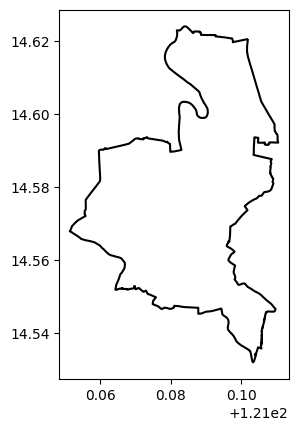

In [4]:
philippines = gpd.read_file('maps/phl_admbnda_adm3_psa_namria_20231106.zip')

pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig.boundary.plot(edgecolor='black')

<AxesSubplot: >

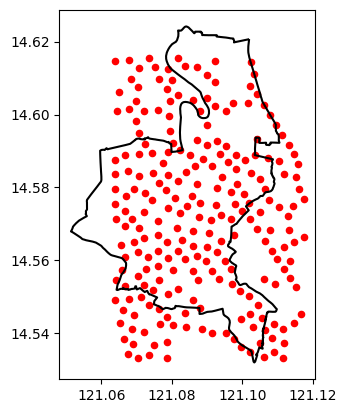

In [5]:
base = pasig.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [6]:
clipped = gpd.clip(street_points, pasig)
len(clipped)

131

<AxesSubplot: >

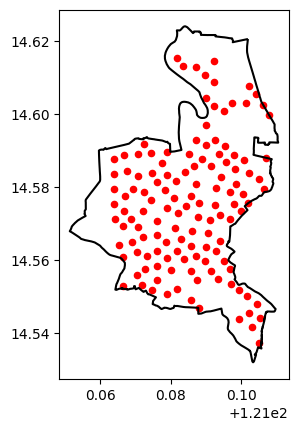

In [10]:
base = pasig.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [24]:
clipped.geometry.y

17     14.553015
169    14.553243
162    14.555817
7      14.560995
161    14.562274
         ...    
23     14.610833
15     14.612915
228    14.613291
38     14.614541
218    14.615457
Length: 131, dtype: float64

In [26]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/pasig_filtered_coordinates.csv', index=False)